<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [ ]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print("Total nulls: \n{}".format(X.isnull().sum()))

Total nulls: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [5]:
print("index information: \n{}".format(X.index))

index information: 
RangeIndex(start=0, stop=506, step=1)


In [6]:
print("data types: \n{}".format(X.dtypes))

data types: 
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [7]:
print("Data shapes: {}".format(X.shape))

Data shapes: (506, 13)


In [8]:
print("Data summary: \n{}".format(X.describe()))

Data summary: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.1

In [9]:
print("Number of unique values:")
for col in X:
    print("  {0}: {1}".format(col, X[col].nunique()))

Number of unique values:
  CRIM: 504
  ZN: 26
  INDUS: 76
  CHAS: 2
  NOX: 81
  RM: 446
  AGE: 356
  DIS: 412
  RAD: 9
  TAX: 66
  PTRATIO: 46
  B: 357
  LSTAT: 455


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [6]:
df = pd.concat([X, y], axis=1)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


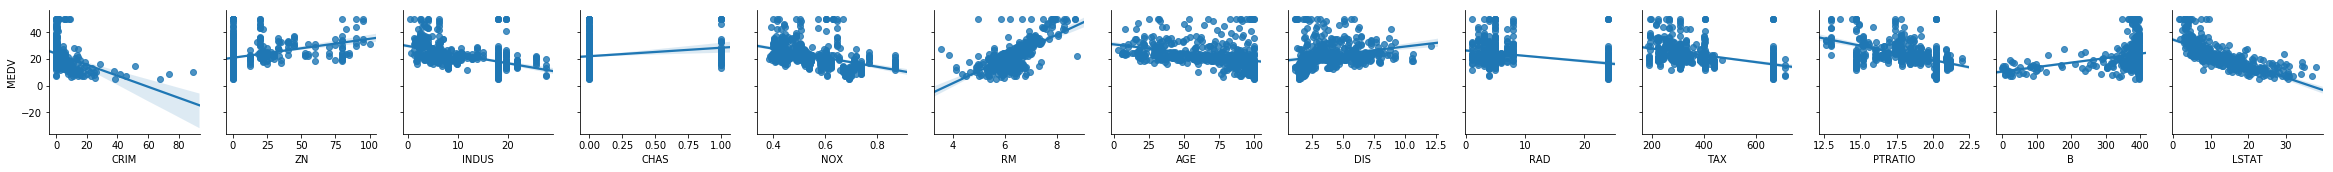

In [8]:
# explore relationship between features and response variable
import seaborn as sns

sns.pairplot(df, x_vars= X.columns.to_list(), y_vars='MEDV', kind='reg');


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
feature_col = ['ZN', 'RM', 'LSTAT']
X_train = X[feature_col]
y_train = y

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6398856030562653

In [14]:
lr.coef_

array([[ 0.01580778,  5.04554308, -0.62401045]])

Text(0, 0.5, 'Observation')

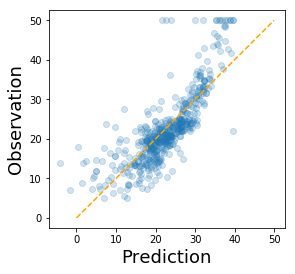

In [15]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(x = lr.predict(X_train), y = y_train, alpha = 0.2);
plt.plot( [0,50],[0,50], ls = '--',c = 'orange' )

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Observation', fontsize=18)



### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_col], y, test_size=0.3, random_state=2019)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

test score:  0.5772521364293157


Text(0, 0.5, 'Observation')

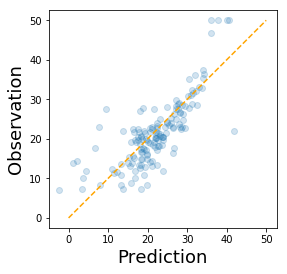

In [19]:
print("test score:  {}".format(lr.score(X_test, y_test)))


fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(x = lr.predict(X_test), y = y_test, alpha = 0.2);
plt.plot( [0,50],[0,50], ls = '--',c = 'orange' )

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Observation', fontsize=18)

test score:  0.6334031976324221


Text(0, 0.5, 'Observation')

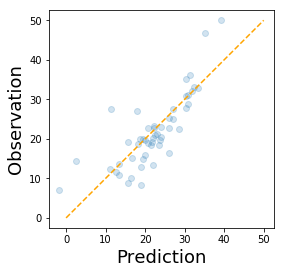

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_col], y, test_size=0.1, random_state=2019)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("test score:  {}".format(lr.score(X_test, y_test)))


fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(x = lr.predict(X_test), y = y_test, alpha = 0.2);
plt.plot( [0,50],[0,50], ls = '--',c = 'orange' )

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Observation', fontsize=18)

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_col], y, test_size=0.2, random_state=2019)

In [32]:
lr = LinearRegression()

In [33]:
k_fold_result = []
for n in range(5,11):
    scores = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=n)
    print("{0} folds: \n mean: {1}, std: {2}".format(n, np.round(scores.mean(),4), np.round(scores.std(),4)))
    k_fold_result.append([n, scores.mean()])

5 folds: 
 mean: 0.6414, std: 0.0514
6 folds: 
 mean: 0.6469, std: 0.0779
7 folds: 
 mean: 0.6488, std: 0.0605
8 folds: 
 mean: 0.6453, std: 0.0928
9 folds: 
 mean: 0.6406, std: 0.1017
10 folds: 
 mean: 0.6425, std: 0.0822


In [34]:
k_fold_result = pd.DataFrame(k_fold_result, columns = ['folds', 'mean_score'])

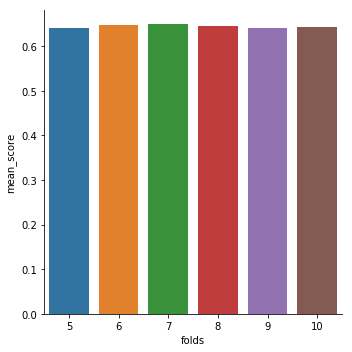

In [35]:
sns.catplot(x = 'folds', y= 'mean_score', data = aaa, kind = 'bar')

## Using Random Forests With the Boston Dataset

#### Create X and y variables for Your Data

In [25]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

#### Divide it into a training and test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

#### Fit a Random Forest on the data

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_ini = RandomForestRegressor(random_state = 2019)

In [28]:
rf_ini.fit(X_train,y_train.values.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=2019, verbose=0, warm_start=False)

#### What are its most important features?

In [29]:
pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf_ini.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

,Features,Importance
5,RM,0.474753
12,LSTAT,0.351382
7,DIS,0.063366
0,CRIM,0.036790
9,TAX,0.018609
6,AGE,0.016825
10,PTRATIO,0.010520
11,B,0.009680
4,NOX,0.007213
2,INDUS,0.005279


#### How well does your model perform on your test set?

score on test set: 0.785272879266584


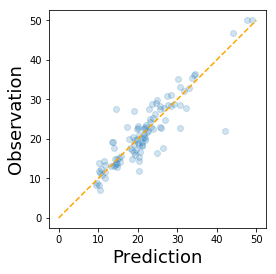

In [30]:

fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(x = rf_ini.predict(X_test), y = y_test, alpha = 0.2);
plt.plot( [0,50],[0,50], ls = '--',c = 'orange' )

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Observation', fontsize=18)

print("score on test set: {}".format(rf_ini.score(X_test, y_test)))

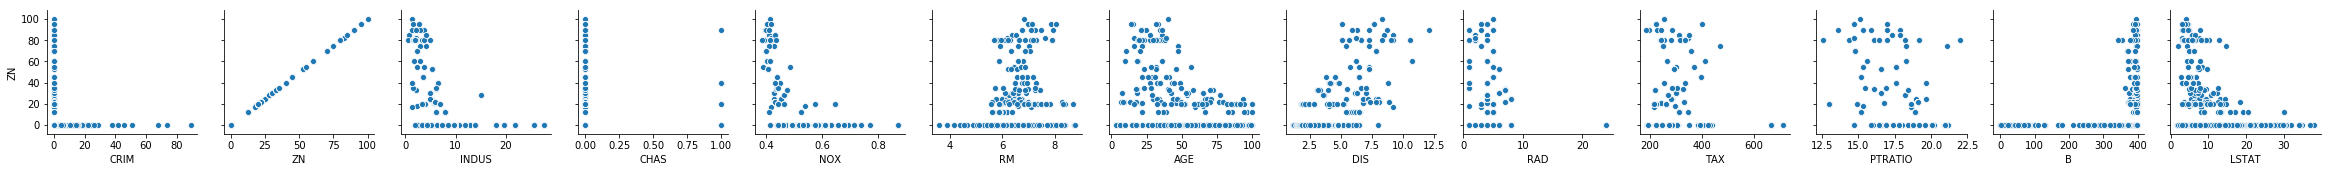

In [57]:
sns.pairplot(df, x_vars= X.columns.to_list(), y_vars='ZN')

#### Challenge:  Try and find at least two improvements to your model to improve test scores.

You can try the following:
 - increasing the number of trees
 - using a different number of maximum features to sample
 - using a different number of minimum samples per leaf

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1, 5, 10, 25, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    'min_samples_leaf': [1, 5, 10, 25]
}

In [32]:
rf = RandomForestRegressor(random_state = 2019)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10)

In [33]:
grid.fit(X_train, y_train.values.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=2019, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 5, 10, 25, 50, 100], 'max_features': ['auto', 'sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 'min_samples_leaf': [1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
grid.best_params_

{'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 50}

In [35]:
cols = ['param_max_features', 'param_min_samples_leaf', 'param_n_estimators', 'mean_test_score', 'std_test_score', 
        'rank_test_score','mean_train_score','std_train_score']
results = pd.DataFrame(grid.cv_results_)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [36]:
results.loc[:, cols].sort_values(by = 'rank_test_score').head()

,param_max_features,param_min_samples_leaf,param_n_estimators,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
196,0.6,1,50,0.882460,0.054927,1,0.981180,0.001885
172,0.5,1,50,0.882321,0.048608,2,0.980484,0.002220
173,0.5,1,100,0.882256,0.047441,3,0.982298,0.001156
149,0.4,1,100,0.882046,0.052035,4,0.982134,0.000823
221,0.7,1,100,0.881400,0.044197,5,0.982689,0.001579


In [37]:
# use the optimal paramters to fit the model again
rf_op = RandomForestRegressor(n_estimators = 50, 
                              max_features = 0.6, 
                              min_samples_leaf = 1,
                              random_state = 2019)
rf_op.fit(X_train,y_train.values.ravel())


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=2019, verbose=0, warm_start=False)

In [38]:
pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf_op.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

,Features,Importance
12,LSTAT,0.350143
5,RM,0.333244
0,CRIM,0.064967
7,DIS,0.057351
10,PTRATIO,0.042106
4,NOX,0.040857
2,INDUS,0.038344
9,TAX,0.029365
6,AGE,0.023957
11,B,0.012789


Text(0, 0.5, 'Observation')

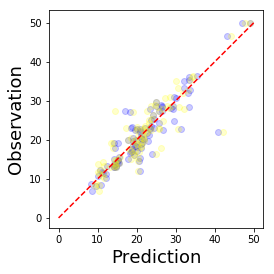

In [39]:

fig, ax = plt.subplots()
ax.set_aspect('equal')


plt.scatter(rf_op.predict(X_test), y_test, alpha = .2, c = 'blue');
plt.scatter(rf_ini.predict(X_test), y_test, alpha = .2, c = 'yellow');
# plt.scatter(x = rf.predict(X_test), y = y_test, alpha = 0.2);
plt.plot( [0,50],[0,50], ls = '--',c = 'red' )

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Observation', fontsize=18)


### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))